In [1]:
# 나눔 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (20.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
import re

# 경고무시
import warnings

# 글꼴 설정
plt.rc('font', family='NanumGothic')
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지

%matplotlib inline

## 1. 데이터준비

### 1. 결측값 채워넣기

- 결측값이 존재하는 칼럼

    **---- 2023/01 ~ 2023/09 결측 ------**  
    국내총생산(GDP)(당해년 가격) (10억원) -3  
    : 분기 데이터 찾음 23년 2분기까지 채움
    1인당 GDP(당해년 가격) (만원) -9  
    : 단위 만원으로 변경

    **----- 2003년 ~ 2005년 결측 -----**  
    달러인덱스 -36  
    : 추가 데이터 찾음
    참고 자료 : https://kr.investing.com/currencies/us-dollar-index-historical-data

    **----- 2003년 ~ 2013년**  
    South Korea -120  
    : 추가 데이터 찾음
    Korea Text -243  
    : 버리거나 or 새로운 피쳐생성 라벨링 예정

    **----- ~2013/1 결측**    
    United States of America -121  
    US Text -245  
    : 버리거나 or 새로운 피쳐생성 라벨링 예정

    **---- 2003년 ~ 2004년 결측**  
    뉴스심리지수 -24

    **----- 2003/01 ~ 2008/06 결측----**  
    현재경기판단 -66  
    현재생활형편 -66  
    소비자심리지수(CCSI) -66  
    
    : 분기 별 데이터 찾음

In [2]:
# df = pd.read_csv('/content/drive/MyDrive/최종프로젝트_우리만/류수정/finance/study/final_68_no.csv')
# 서치 이후 데이터 결측 채우기
# df = df.fillna(method = 'bfill').fillna(method = 'ffill')
# df.to_csv('finance_final_68.csv', index=False, encoding='utf-8-sig')

In [223]:
df = pd.read_csv('/content/drive/MyDrive/경제지표데이터/finance_final_68.csv')
df.columns

Index(['날짜', '선행종합지수(2020=100)', '재고순환지표(%p)', '경제심리지수',
       '기계류내수출하지수(선박제외)(2020=100)', '건설수주액(실질)(십억원)', '수출입물가비율(2015=100)',
       '코스피(1980.1.4=100)', '장단기금리차(%p)', '동행종합지수(2020=100)',
       '광공업생산지수(2020=100)', '서비스업생산지수(도소매업제외)(2020=100)', '건설기성액(실질)(십억원)',
       '소매판매액지수(2020=100)', '내수출하지수(2020=100)', '수입액(실질)(백만불)',
       '비농림어업취업자수(천명)', '후행종합지수(2020=100)', '생산자제품재고지수(2020=100)',
       '소비자물가지수변화율(서비스)', '소비재수입액(실질)(백만불)', '취업자수(천명)', 'CP유통수익률(%p)',
       '실업률총계', '실_15-19세', '실_20-29세', '실_30-39세', '실_40-49세', '실_50-59세',
       '실_60세이상', '경제위기', '국내총생산(GDP)(당해년 가격) (10억원\)', '1인당 GDP(당해년 가격) (만원)',
       'GDP 성장률 (%)', '소비자물가지수', '농산물및석유류제외지수', '식료품 및 에너지제외 지수', '기준금리',
       '원달러환율', '달러인덱스', '미_경기침체데이터', '미_실업률', '미_cpi', '미_mom', '미_yoy',
       '미_corecpi', '미_coremom', '미_coreyoy', '콜금리', 'South Korea',
       'Korea Text', 'United States of America', 'US Text', '동행지수순환변동치',
       '선행지수순환변동치', 'BSI_전산업', 'BSI_제조업', 'BSI_비제조업', '뉴스심리지수', '현재경기판단',
       '

### 2. 데이터 타입 나누기

In [224]:
# 숫자형식만 가져오기
n_df = df.select_dtypes(include=['number'])
n_df

,선행종합지수(2020=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2020=100),광공업생산지수(2020=100),...,뉴스심리지수,현재경기판단,현재생활형편,소비자심리지수(CCSI),up_down,미_금리,미국채_2,미국채_5,미국채_10,미국채_20
0,53.7,-0.4,101.4,90.1,8145.7,148.2,604.9,0.99,57.8,51.6,...,106.39,82,87,97.0,1,1.24,1.743333,3.052381,4.048571,5.021905
1,53.7,-0.9,100.1,88.8,8048.8,148.9,595.1,0.84,57.7,51.7,...,106.39,82,87,97.0,1,1.26,1.627895,2.897895,3.902632,4.870000
2,53.8,-1.8,98.5,87.6,7904.5,149.7,591.1,0.72,57.7,51.8,...,106.39,82,87,97.0,1,1.25,1.573810,2.783810,3.807143,4.816190
3,53.7,-6.2,97.5,86.3,7858.6,150.3,576.1,0.61,57.6,51.9,...,106.39,71,45,91.0,0,1.26,1.622381,2.928571,3.958571,4.911905
4,53.7,-8.5,95.5,85.4,7624.8,151.2,583.4,0.53,57.8,51.9,...,106.39,71,45,91.0,1,1.26,1.415238,2.515714,3.569048,4.521429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,109.8,-17.2,93.2,99.9,10466.3,84.5,2488.4,-0.15,110.3,104.4,...,96.52,64,88,98.0,1,5.06,4.131818,3.591364,3.573636,3.963636
245,110.5,-13.0,94.6,99.0,11826.5,86.0,2548.9,-0.16,110.3,104.7,...,101.64,69,89,100.7,1,5.08,4.639524,3.949524,3.748095,4.041905
246,111.1,-9.6,94.7,99.3,12177.8,86.6,2572.6,-0.04,110.0,104.5,...,102.08,75,91,103.2,1,5.12,4.828500,4.141500,3.899500,4.149500
247,111.4,-7.9,94.6,98.4,9882.9,86.8,2585.1,0.12,110.0,105.0,...,99.03,72,91,103.1,1,5.33,4.901739,4.306522,4.167826,4.456522


In [225]:
x = n_df.drop(['기준금리','콜금리'], axis=1)
target = df['기준금리']

In [226]:
target

0      4.25
1      4.25
2      4.25
3      4.25
4      4.00
       ... 
244    3.50
245    3.50
246    3.50
247    3.50
248    3.50
Name: 기준금리, Length: 249, dtype: float64

In [227]:
# 데이터 표준화
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

# n_df = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
n_df = x

In [228]:
n_df

,선행종합지수(2020=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2020=100),광공업생산지수(2020=100),...,뉴스심리지수,현재경기판단,현재생활형편,소비자심리지수(CCSI),up_down,미_금리,미국채_2,미국채_5,미국채_10,미국채_20
0,53.7,-0.4,101.4,90.1,8145.7,148.2,604.9,0.99,57.8,51.6,...,106.39,82,87,97.0,1,1.24,1.743333,3.052381,4.048571,5.021905
1,53.7,-0.9,100.1,88.8,8048.8,148.9,595.1,0.84,57.7,51.7,...,106.39,82,87,97.0,1,1.26,1.627895,2.897895,3.902632,4.870000
2,53.8,-1.8,98.5,87.6,7904.5,149.7,591.1,0.72,57.7,51.8,...,106.39,82,87,97.0,1,1.25,1.573810,2.783810,3.807143,4.816190
3,53.7,-6.2,97.5,86.3,7858.6,150.3,576.1,0.61,57.6,51.9,...,106.39,71,45,91.0,0,1.26,1.622381,2.928571,3.958571,4.911905
4,53.7,-8.5,95.5,85.4,7624.8,151.2,583.4,0.53,57.8,51.9,...,106.39,71,45,91.0,1,1.26,1.415238,2.515714,3.569048,4.521429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,109.8,-17.2,93.2,99.9,10466.3,84.5,2488.4,-0.15,110.3,104.4,...,96.52,64,88,98.0,1,5.06,4.131818,3.591364,3.573636,3.963636
245,110.5,-13.0,94.6,99.0,11826.5,86.0,2548.9,-0.16,110.3,104.7,...,101.64,69,89,100.7,1,5.08,4.639524,3.949524,3.748095,4.041905
246,111.1,-9.6,94.7,99.3,12177.8,86.6,2572.6,-0.04,110.0,104.5,...,102.08,75,91,103.2,1,5.12,4.828500,4.141500,3.899500,4.149500
247,111.4,-7.9,94.6,98.4,9882.9,86.8,2585.1,0.12,110.0,105.0,...,99.03,72,91,103.1,1,5.33,4.901739,4.306522,4.167826,4.456522


### 3. 변수 선택

- randomforestregressor를 이용한 변수중요도로 15개  
- EDA를 통한 주관적 변수 5개
> 총 20개 변수 선택

In [23]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [24]:
# RandomForestRegressor 모델 생성
model = RandomForestRegressor()

# 모델 훈련
model.fit(x, target)

# 변수 중요도 추출
feature_importances = model.feature_importances_

# 결과출력
se = pd.Series(data = feature_importances)
col = pd.Series(data = x.columns)

imp = pd.concat([col,se],axis=1)
imp = imp.sort_values(by=1, ascending=False)
imp = imp.rename(columns={0:'변수명',1:'변수중요도'})
imp.reset_index(inplace=True, drop=True)

In [25]:
imp.iloc[:15,:]['변수명'].unique()

array(['CP유통수익률(%p)', '미국채_2', 'GDP 성장률 (%)', '원달러환율',
       '수출입물가비율(2015=100)', '미국채_5', '경제심리지수', '건설수주액(실질)(십억원)', '달러인덱스',
       '동행지수순환변동치', '농산물및석유류제외지수', '기계류내수출하지수(선박제외)(2020=100)', '경제위기',
       '식료품 및 에너지제외 지수', '1인당 GDP(당해년 가격) (만원)'], dtype=object)

In [229]:
s_1 = n_df.loc[:,['CP유통수익률(%p)', '미국채_2', 'GDP 성장률 (%)', '원달러환율', '미국채_5',
       '수출입물가비율(2015=100)', '내수출하지수(2020=100)', '농산물및석유류제외지수',
       '식료품 및 에너지제외 지수', '동행지수순환변동치', '경제심리지수', '건설수주액(실질)(십억원)', '달러인덱스',
       '미국채_20', '미_금리']]


s_2 = n_df.loc[:,['소비자물가지수변화율(서비스)','미_coremom','뉴스심리지수','소비자심리지수(CCSI)','South Korea']]
imp = pd.concat([s_1,s_2],axis=1)
imp

In [230]:
s_1

,CP유통수익률(%p),미국채_2,GDP 성장률 (%),원달러환율,미국채_5,수출입물가비율(2015=100),내수출하지수(2020=100),농산물및석유류제외지수,식료품 및 에너지제외 지수,동행지수순환변동치,경제심리지수,건설수주액(실질)(십억원),달러인덱스,미국채_20,미_금리
0,4.6,1.743333,4.2,1070.1,3.052381,148.2,74.3,69.434,71.049,101.1,101.4,8145.7,100.140000,5.021905,1.24
1,4.7,1.627895,4.2,1193.7,2.897895,148.9,73.5,69.561,71.245,100.7,100.1,8048.8,99.810000,4.870000,1.26
2,4.8,1.573810,4.2,1254.6,2.783810,149.7,72.9,70.266,71.965,100.4,98.5,7904.5,99.490000,4.816190,1.25
3,5.0,1.622381,2.3,1215.3,2.928571,150.3,72.0,70.330,72.162,99.8,97.5,7858.6,98.100000,4.911905,1.26
4,5.1,1.415238,2.3,1205.9,2.515714,151.2,71.6,70.459,72.227,99.8,95.5,7624.8,97.380000,4.521429,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,4.0,4.131818,0.9,1327.2,3.591364,84.5,96.7,110.300,108.630,100.3,93.2,10466.3,119.855209,3.963636,5.06
245,4.0,4.639524,0.9,1317.7,3.949524,86.0,96.8,110.510,108.700,100.1,94.6,11826.5,119.710371,4.041905,5.08
246,4.0,4.828500,2.4,1274.6,4.141500,86.6,97.0,110.400,108.960,99.6,94.7,12177.8,118.584800,4.149500,5.12
247,4.0,4.901739,2.4,1321.8,4.306522,86.8,96.7,110.670,109.250,99.4,94.6,9882.9,120.378709,4.456522,5.33


- 주관적 변수선택을 위한 EDA
- (한석오빠 코드 참고)

In [28]:
def plot_time_series(df, column_number, scale_factor=1.0):
    # 데이터프레임 복사 (새로운 변수에 할당)
    plot_data = df[['기준금리', df.columns[column_number]]].copy()
    plot_data['날짜'] = df['날짜']

    # '날짜' 칼럼을 datetime 형식으로 변환
    #plot_data['날짜'] = pd.to_datetime(plot_data['날짜'])

    # 선택한 칼럼에 스케일링 적용
    plot_data.iloc[:, 1] *= scale_factor

    # Seaborn Line Plot 그리기
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=plot_data, x='날짜', y='기준금리', label='기준금리', c = 'r')
    sns.lineplot(data=plot_data, x='날짜', y=plot_data.columns[1], label=f'{plot_data.columns[1]}', c = 'b')

    plt.title(f'기준금리와 {plot_data.columns[1]}의 추이 분석')
    plt.xlabel('날짜')
    plt.ylabel(f'값 (scaled by {scale_factor})')

    plt.legend()

    # scaling 정보 출력
    print(f'Scaling: {plot_data.columns[1]} * {scale_factor}')

    plt.show()

Scaling: 뉴스심리지수 * 0.05


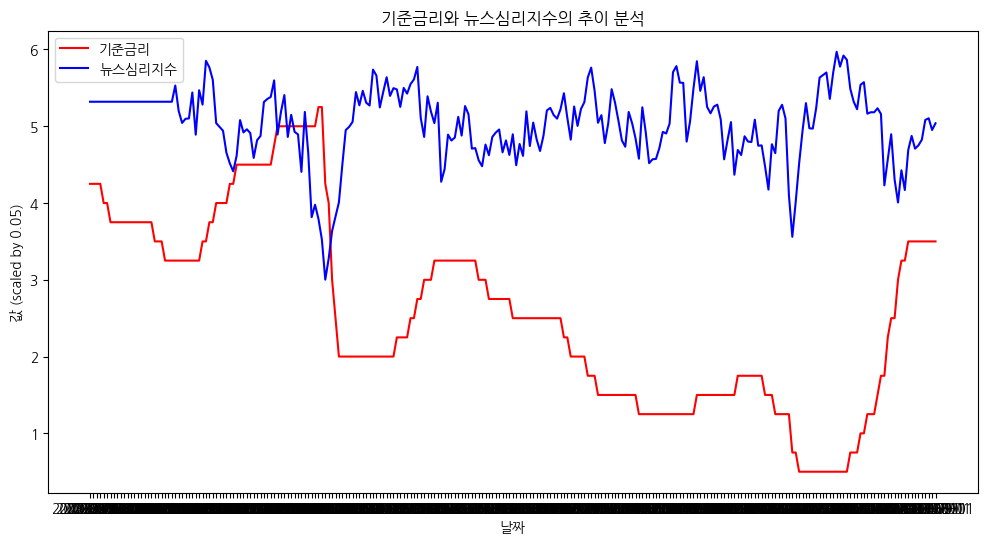

In [29]:
plot_time_series(df, 58, scale_factor=0.05)

Scaling: 소비자심리지수(CCSI) * 0.05


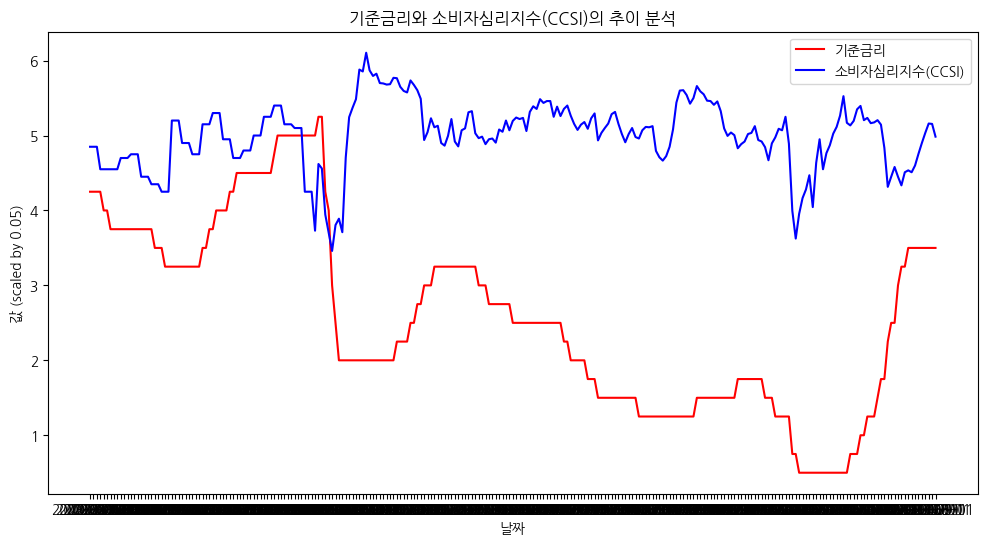

In [30]:
plot_time_series(df, 61, scale_factor=0.05)

Scaling: South Korea * 0.05


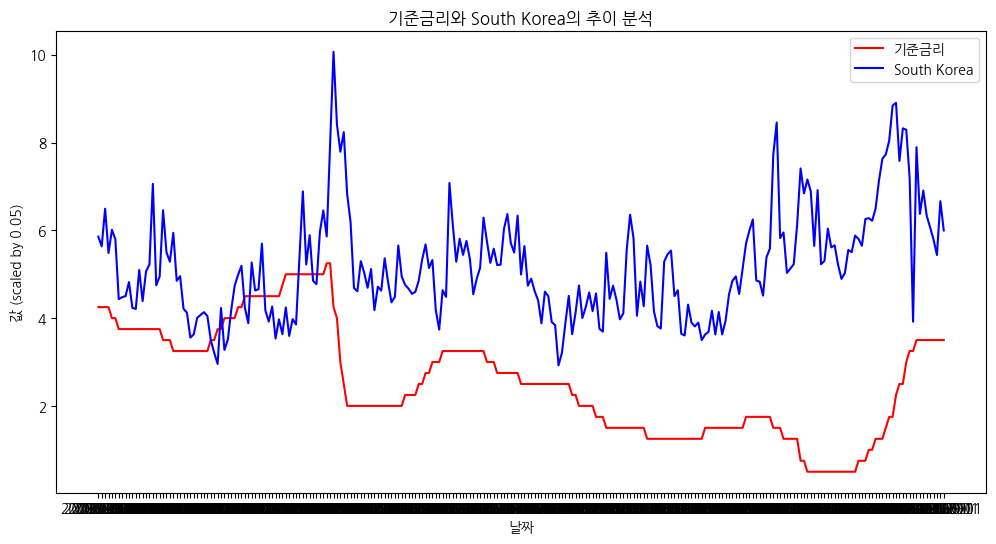

In [31]:
plot_time_series(df, 49, scale_factor=0.05)

In [231]:
# 주관적 변수선택 : 소비자물가지수변화율(서비스), 미_coremom, 뉴스심리지수, ccsi, epu지수
s_2 = n_df.loc[:,['소비자물가지수변화율(서비스)','미_coremom','뉴스심리지수','소비자심리지수(CCSI)','South Korea']]
imp = pd.concat([s_1,s_2],axis=1)
imp

,CP유통수익률(%p),미국채_2,GDP 성장률 (%),원달러환율,미국채_5,수출입물가비율(2015=100),내수출하지수(2020=100),농산물및석유류제외지수,식료품 및 에너지제외 지수,동행지수순환변동치,경제심리지수,건설수주액(실질)(십억원),달러인덱스,미국채_20,미_금리,소비자물가지수변화율(서비스),미_coremom,뉴스심리지수,소비자심리지수(CCSI),South Korea
0,4.6,1.743333,4.2,1070.1,3.052381,148.2,74.3,69.434,71.049,101.1,101.4,8145.7,100.140000,5.021905,1.24,2.9,1.960784,106.39,97.0,117.17
1,4.7,1.627895,4.2,1193.7,2.897895,148.9,73.5,69.561,71.245,100.7,100.1,8048.8,99.810000,4.870000,1.26,3.1,1.797990,106.39,97.0,112.72
2,4.8,1.573810,4.2,1254.6,2.783810,149.7,72.9,70.266,71.965,100.4,98.5,7904.5,99.490000,4.816190,1.25,3.4,1.744186,106.39,97.0,129.87
3,5.0,1.622381,2.3,1215.3,2.928571,150.3,72.0,70.330,72.162,99.8,97.5,7858.6,98.100000,4.911905,1.26,3.7,1.476015,106.39,91.0,109.71
4,5.1,1.415238,2.3,1205.9,2.515714,151.2,71.6,70.459,72.227,99.8,95.5,7624.8,97.380000,4.521429,1.26,3.8,1.526316,106.39,91.0,120.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,4.0,4.131818,0.9,1327.2,3.591364,84.5,96.7,110.300,108.630,100.3,93.2,10466.3,119.855209,3.963636,5.06,3.8,5.328639,96.52,98.0,121.39
245,4.0,4.639524,0.9,1317.7,3.949524,86.0,96.8,110.510,108.700,100.1,94.6,11826.5,119.710371,4.041905,5.08,3.6,4.860943,101.64,100.7,115.84
246,4.0,4.828500,2.4,1274.6,4.141500,86.6,97.0,110.400,108.960,99.6,94.7,12177.8,118.584800,4.149500,5.12,3.3,4.704925,102.08,103.2,108.78
247,4.0,4.901739,2.4,1321.8,4.306522,86.8,96.7,110.670,109.250,99.4,94.6,9882.9,120.378709,4.456522,5.33,3.1,4.389848,99.03,103.1,133.30


## LSTM 모델 돌리기

In [232]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [233]:
target

0      4.25
1      4.25
2      4.25
3      4.25
4      4.00
       ... 
244    3.50
245    3.50
246    3.50
247    3.50
248    3.50
Name: 기준금리, Length: 249, dtype: float64

In [234]:
target = target.to_frame()

In [235]:
target['날짜'] = pd.to_datetime(df['날짜'])
target.set_index('날짜',inplace=True)

In [236]:
imp['날짜'] = pd.to_datetime(df['날짜'])
imp.set_index('날짜', inplace=True)

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

In [238]:
imp2 = imp.reset_index()
target2 = target.reset_index()

In [239]:
all_data = pd.merge(imp2,target2, on='날짜', how='outer')
all_data.set_index('날짜',inplace=True)

df = all_data.reset_index()

In [279]:
# 시계열 데이터 정규화 (MinMax 스케일링)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(all_data.values)

In [280]:
# 데이터와 타겟 분리
X = scaled_data[:, :-1]  # 마지막 열을 제외한 모든 열은 독립변수
y = scaled_data[:, -1]

In [281]:
# 시계열 데이터를 LSTM 입력 형식에 맞게 변환
def create_sequences(X, y, time_steps=6):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps, :])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

In [282]:
time_steps = 6
X_seq, y_seq = create_sequences(X, y, time_steps)

In [283]:
test_size = int(len(X_seq) * 0.2)
X_train, X_test = X_seq[:-test_size], X_seq[-test_size:]
y_train, y_test = y_seq[:-test_size], y_seq[-test_size:]

In [284]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6, 20), (48, 6, 20), (195,), (48,))

In [272]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 6, 20), (49, 6, 20), (194,), (49,))

In [285]:
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(time_steps, X.shape[1])))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=6))  # 출력값을 6개로 설정
model.compile(optimizer='adam', loss='mse')

In [286]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 4s 102ms/step - loss: 0.2409 - val_loss: 0.0635
Epoch 2/50
7/7 [==============================] - 0s 21ms/step - loss: 0.1508 - val_loss: 0.0503
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0586 - val_loss: 0.2374
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 0.0506 - val_loss: 0.0748
Epoch 5/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0322 - val_loss: 0.0521
Epoch 6/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0241 - val_loss: 0.0598
Epoch 7/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0185 - val_loss: 0.0330
Epoch 8/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0158 - val_loss: 0.0273
Epoch 9/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0137 - val_loss: 0.0229
Epoch 10/50
7/7 [==============================] - 0s 22ms/step - loss: 0.0124 - val_loss: 0.0206
Epoch 11/50
7/7 [===========

In [287]:
# 테스트 세트로 예측
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


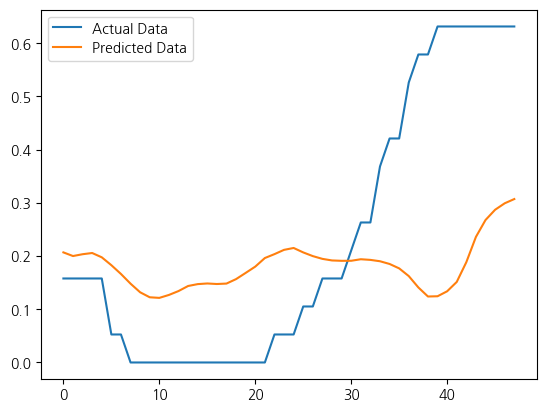

In [288]:
plt.plot(y_test, label='Actual Data')
plt.plot(y_pred[:, -1], label='Predicted Data')
plt.legend()
plt.show()

### ver2

In [349]:
df = all_data.reset_index()

In [306]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [307]:
# 시계열 데이터를 LSTM 입력 형식에 맞게 변환
time_steps = 6  # 한 달을 하나의 타임 스텝으로 설정
X, y = [], []
for i in range(len(scaled_data) - time_steps):
    X.append(scaled_data[i:i + time_steps, :-1])  # 마지막 열을 제외한 독립변수
    y.append(scaled_data[i + time_steps, -1])  # 종속변수

X, y = np.array(X), np.array(y)

In [308]:
# 데이터를 훈련 세트와 테스트 세트로 나눔 (날짜 기준으로)
train_size = int(len(df) * 0.8)  # 예제에서는 80%를 훈련 세트로 사용
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [309]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199, 6, 20), (44, 6, 20), (199,), (44,))

In [326]:
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
# model.add(LSTM(units=50, activation='relu'))
model.add(TimeDistributed(Dense(1)))  # 출력값을 6개로 설정
model.compile(optimizer='adam', loss='mse')

In [327]:
# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 5s 93ms/step - loss: 0.1977 - val_loss: 0.0613
Epoch 2/50
7/7 [==============================] - 0s 14ms/step - loss: 0.1008 - val_loss: 0.1681
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0998 - val_loss: 0.1415
Epoch 4/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0851 - val_loss: 0.0901
Epoch 5/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0827 - val_loss: 0.0848
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0802 - val_loss: 0.0983
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0752 - val_loss: 0.1075
Epoch 8/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0726 - val_loss: 0.1137
Epoch 9/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0700 - val_loss: 0.1038
Epoch 10/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0679 - val_loss: 0.1088
Epoch 11/50
7/7 [============

In [328]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [331]:
y_pred.shape

(44, 6, 1)

ValueError: ignored

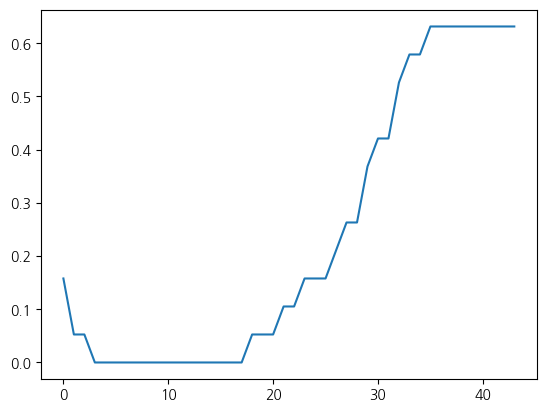

In [329]:
# 예측 결과 시각화
plt.plot(y_test, label='Actual Data')

plt.legend()
plt.show()

In [314]:
y_pred.shape

(44, 6)

In [319]:
y_test[0]

0.15789473684210525

### ver3

In [ ]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [332]:
# train, test 나누기
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [333]:
train.shape, test.shape

((199, 21), (50, 21))

In [334]:
# X와 y로 분리
def create_dataset(dataset, time_steps=1, output_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps - output_steps + 1):
        a = dataset[i:(i + time_steps), :-1]
        dataX.append(a)
        dataY.append(dataset[i + time_steps:i + time_steps + output_steps, -1])  # 수정된 부분
    return np.array(dataX), np.array(dataY)

In [335]:
time_steps = 3  # 시간 단계 수 (조절 가능)
output_steps = 6  # 출력 시간 단계 수 (미래 6개월)
X_train, y_train = create_dataset(train, time_steps, output_steps)
X_test, y_test = create_dataset(test, time_steps, output_steps)

In [336]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191, 3, 20), (42, 3, 20), (191, 6), (42, 6))

((195, 6, 20), (48, 6, 20), (195,), (48,))

In [245]:
# LSTM 입력 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], all_data.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], all_data.shape[1]))

In [246]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191, 3, 21), (42, 3, 21), (191, 6, 21), (42, 6, 21), (249, 21))

In [337]:
# Many-to-Many LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [339]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 3, 50)             14200     
                                                                 
 time_distributed_15 (TimeD  (None, 3, 1)              51        
 istributed)                                                     
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [338]:
# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# 결과 시각화
plt.figure(figsize=(14, 7))
for i in range(output_steps):
    plt.plot(test.index[time_steps + i:time_steps + i + len(y_pred)], scaler.inverse_transform(y_test[:, i, :])[:, -1], label=f'Actual {i+1} Month')
    plt.plot(test.index[time_steps + i:time_steps + i + len(y_pred)], scaler.inverse_transform(y_pred[:, i, :])[:, -1], label=f'Predicted {i+1} Month', linestyle='dashed')

plt.title('Many-to-Many LSTM Model for Time Series Prediction')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [123]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), all_data.shape[1]-1)), y_pred.reshape(-1, 1)), axis=1))[:, -1]

2/2 [==============================] - 0s 6ms/step


In [124]:
results = pd.DataFrame({'Actual': all_data['기준금리'][train_size + time_steps:], 'Predicted': y_pred_inverse})

In [69]:
results

,Actual,Predicted
날짜,,
2019-11-01,1.25,1.316526
2019-12-01,1.25,1.193664
2020-01-01,1.25,1.094729
2020-02-01,1.25,1.079662
2020-03-01,0.75,1.069948
2020-04-01,0.75,0.872194
2020-05-01,0.50,0.611071
2020-06-01,0.50,0.425445
2020-07-01,0.50,0.326458


### ver4

In [376]:
all_data

,CP유통수익률(%p),미국채_2,GDP 성장률 (%),원달러환율,미국채_5,수출입물가비율(2015=100),내수출하지수(2020=100),농산물및석유류제외지수,식료품 및 에너지제외 지수,동행지수순환변동치,...,건설수주액(실질)(십억원),달러인덱스,미국채_20,미_금리,소비자물가지수변화율(서비스),미_coremom,뉴스심리지수,소비자심리지수(CCSI),South Korea,기준금리
날짜,,,,,,,,,,,,,,,,,,,,,
2003-01-01,4.6,1.743333,4.2,1070.1,3.052381,148.2,74.3,69.434,71.049,101.1,...,8145.7,100.140000,5.021905,1.24,2.9,1.960784,106.39,97.0,117.17,4.25
2003-02-01,4.7,1.627895,4.2,1193.7,2.897895,148.9,73.5,69.561,71.245,100.7,...,8048.8,99.810000,4.870000,1.26,3.1,1.797990,106.39,97.0,112.72,4.25
2003-03-01,4.8,1.573810,4.2,1254.6,2.783810,149.7,72.9,70.266,71.965,100.4,...,7904.5,99.490000,4.816190,1.25,3.4,1.744186,106.39,97.0,129.87,4.25
2003-04-01,5.0,1.622381,2.3,1215.3,2.928571,150.3,72.0,70.330,72.162,99.8,...,7858.6,98.100000,4.911905,1.26,3.7,1.476015,106.39,91.0,109.71,4.25
2003-05-01,5.1,1.415238,2.3,1205.9,2.515714,151.2,71.6,70.459,72.227,99.8,...,7624.8,97.380000,4.521429,1.26,3.8,1.526316,106.39,91.0,120.27,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.0,4.131818,0.9,1327.2,3.591364,84.5,96.7,110.300,108.630,100.3,...,10466.3,119.855209,3.963636,5.06,3.8,5.328639,96.52,98.0,121.39,3.50
2023-06-01,4.0,4.639524,0.9,1317.7,3.949524,86.0,96.8,110.510,108.700,100.1,...,11826.5,119.710371,4.041905,5.08,3.6,4.860943,101.64,100.7,115.84,3.50
2023-07-01,4.0,4.828500,2.4,1274.6,4.141500,86.6,97.0,110.400,108.960,99.6,...,12177.8,118.584800,4.149500,5.12,3.3,4.704925,102.08,103.2,108.78,3.50


In [351]:
df

,날짜,CP유통수익률(%p),미국채_2,GDP 성장률 (%),원달러환율,미국채_5,수출입물가비율(2015=100),내수출하지수(2020=100),농산물및석유류제외지수,식료품 및 에너지제외 지수,...,건설수주액(실질)(십억원),달러인덱스,미국채_20,미_금리,소비자물가지수변화율(서비스),미_coremom,뉴스심리지수,소비자심리지수(CCSI),South Korea,기준금리
0,2003-01-01,4.6,1.743333,4.2,1070.1,3.052381,148.2,74.3,69.434,71.049,...,8145.7,100.140000,5.021905,1.24,2.9,1.960784,106.39,97.0,117.17,4.25
1,2003-02-01,4.7,1.627895,4.2,1193.7,2.897895,148.9,73.5,69.561,71.245,...,8048.8,99.810000,4.870000,1.26,3.1,1.797990,106.39,97.0,112.72,4.25
2,2003-03-01,4.8,1.573810,4.2,1254.6,2.783810,149.7,72.9,70.266,71.965,...,7904.5,99.490000,4.816190,1.25,3.4,1.744186,106.39,97.0,129.87,4.25
3,2003-04-01,5.0,1.622381,2.3,1215.3,2.928571,150.3,72.0,70.330,72.162,...,7858.6,98.100000,4.911905,1.26,3.7,1.476015,106.39,91.0,109.71,4.25
4,2003-05-01,5.1,1.415238,2.3,1205.9,2.515714,151.2,71.6,70.459,72.227,...,7624.8,97.380000,4.521429,1.26,3.8,1.526316,106.39,91.0,120.27,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,4.0,4.131818,0.9,1327.2,3.591364,84.5,96.7,110.300,108.630,...,10466.3,119.855209,3.963636,5.06,3.8,5.328639,96.52,98.0,121.39,3.50
245,2023-06-01,4.0,4.639524,0.9,1317.7,3.949524,86.0,96.8,110.510,108.700,...,11826.5,119.710371,4.041905,5.08,3.6,4.860943,101.64,100.7,115.84,3.50
246,2023-07-01,4.0,4.828500,2.4,1274.6,4.141500,86.6,97.0,110.400,108.960,...,12177.8,118.584800,4.149500,5.12,3.3,4.704925,102.08,103.2,108.78,3.50
247,2023-08-01,4.0,4.901739,2.4,1321.8,4.306522,86.8,96.7,110.670,109.250,...,9882.9,120.378709,4.456522,5.33,3.1,4.389848,99.03,103.1,133.30,3.50


In [352]:
all_data.shape

(249, 21)

In [353]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [354]:
all_data.columns

Index(['CP유통수익률(%p)', '미국채_2', 'GDP 성장률 (%)', '원달러환율', '미국채_5',
       '수출입물가비율(2015=100)', '내수출하지수(2020=100)', '농산물및석유류제외지수',
       '식료품 및 에너지제외 지수', '동행지수순환변동치', '경제심리지수', '건설수주액(실질)(십억원)', '달러인덱스',
       '미국채_20', '미_금리', '소비자물가지수변화율(서비스)', '미_coremom', '뉴스심리지수',
       '소비자심리지수(CCSI)', 'South Korea', '기준금리'],
      dtype='object')

In [346]:
# y = df['기준금리']
# df.drop(['날짜'd], axis = 1, inplace = True)

In [355]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(all_data)

In [356]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:(i+n_steps), :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

# 시퀀스 길이 정의
n_steps = 12  # 예제로 12개의 월을 기반으로 다음 6개를 예측

# 시퀀스 데이터 생성
X, y = create_sequences(scaled_data, n_steps)

In [357]:
X.shape, y.shape

((237, 12, 20), (237,))

In [362]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(units=1))  # 출력 뉴런을 1로 수정 (단일 종속 변수를 예측하므로)
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 50)                14200     
                                                                 
 dense_37 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [363]:
model.fit(X, y, epochs=50, batch_size=8)

Epoch 1/50
30/30 [==============================] - 2s 6ms/step - loss: 0.0740
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 5/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 6/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 7/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 8/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 9/50
30/30 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 10/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 11/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 12/50
30/30 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/50
30/30 [==============================

In [368]:
def create_last_sequence(data, n_steps):
    last_sequence = data[-n_steps:, :-1]
    last_sequence = last_sequence.reshape((1, n_steps, last_sequence.shape[1]))
    return last_sequence

In [370]:
last_sequence = create_last_sequence(scaled_data, n_steps)

In [377]:
last_sequence.shape

(1, 12, 20)

In [379]:
prediction = model.predict(last_sequence)

1/1 [==============================] - 0s 37ms/step


In [380]:
prediction.shape

(1, 1)

In [378]:
future_predictions = []
for i in range(6):
    prediction = model.predict(last_sequence)
    future_predictions.append(prediction)
    last_sequence = np.concatenate((last_sequence[:, 1:, :], prediction.reshape((1, 1, last_sequence.shape[2]))), axis=1)

1/1 [==============================] - 0s 20ms/step


ValueError: ignored

In [ ]:
# 예측값 스케일 역변환
future_predictions = np.array(future_predictions).reshape((6, data.shape[1]))
future_predictions = scaler.inverse_transform(future_predictions)

In [ ]:
# 예측 결과 출력
print("다음 6개 값 예측:")
print(pd.DataFrame(future_predictions, columns=data.columns))